In [1]:
import pandas as pd
import json
import torch
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

from biological_fuzzy_logic_networks.DREAM_analysis.utils import create_bfz, prepare_cell_line_data, cl_data_to_input

/dccstor/ipc1/.conda/envs/biofuzznet2/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
work_dir = "/dccstor/ipc1/CAR/DREAM/Model/Test/MEK_FAK_ERK/"

In [4]:
succes_runs = [9, 10, 11, 12, 13, 14, 18, 19, 20, 21, 22, 23, 24, 25, 26]
config_list = []
for i in succes_runs:
    ckpt = torch.load(f"{work_dir}{i}/model.pt")
    print(ckpt["loss"])
    
    with open(f"{work_dir}{i}/{i}_config.json") as f:
        config = json.load(f)
        
    
    print(config["learning_rate"])
    print(config["batch_size"])
    config_list.append(config)
        
    

tensor(0.0267)
0.01
300
tensor(0.0267)
0.01
300
tensor(0.0267)
0.01
300
tensor(0.0267)
0.005
300
tensor(0.0267)
0.005
300
tensor(0.0267)
0.005
300
tensor(0.0267)
0.01
1000
tensor(0.0267)
0.01
1000
tensor(0.0267)
0.01
1000
tensor(0.0267)
0.005
1000
tensor(0.0267)
0.005
1000
tensor(0.0267)
0.005
1000
tensor(0.0267)
0.2
1000
tensor(0.0267)
0.2
1000
tensor(0.0267)
0.2
1000


In [5]:
sqrt(0.0267)

0.16340134638368192

In [6]:
temp=[{key: value for key, value in config.items() if key in ["learning_rate", "n_epochs", "batch_size"]} for config in config_list]
succes_params = pd.concat([pd.DataFrame(c, 
                        index=[0,1,2]) for c in temp], 
          keys=succes_runs, 
          names=["param_setting", ""]).reset_index("param_setting", drop=False).reset_index(drop=True)


In [7]:
config

{'pkn_sif': '/dccstor/ipc1/CAR/DREAM/DREAMdata/MEK_FAK_ERK.sif',
 'network_class': 'DREAMBioFuzzNet',
 'data_file': ['/dccstor/ipc1/CAR/DREAM/DREAMdata/HCC1428.csv',
  '/dccstor/ipc1/CAR/DREAM/DREAMdata/HCC70.csv',
  '/dccstor/ipc1/CAR/DREAM/DREAMdata/HCC202.csv',
  '/dccstor/ipc1/CAR/DREAM/DREAMdata/BT20.csv',
  '/dccstor/ipc1/CAR/DREAM/DREAMdata/MDAMB415.csv',
  '/dccstor/ipc1/CAR/DREAM/DREAMdata/HCC2157.csv',
  '/dccstor/ipc1/CAR/DREAM/DREAMdata/MCF10F.csv',
  '/dccstor/ipc1/CAR/DREAM/DREAMdata/BT474.csv',
  '/dccstor/ipc1/CAR/DREAM/DREAMdata/CAMA1.csv',
  '/dccstor/ipc1/CAR/DREAM/DREAMdata/Hs578T.csv',
  '/dccstor/ipc1/CAR/DREAM/DREAMdata/MCF7.csv',
  '/dccstor/ipc1/CAR/DREAM/DREAMdata/MDAMB175VII.csv',
  '/dccstor/ipc1/CAR/DREAM/DREAMdata/MCF10A.csv',
  '/dccstor/ipc1/CAR/DREAM/DREAMdata/UACC812.csv',
  '/dccstor/ipc1/CAR/DREAM/DREAMdata/ZR751.csv',
  '/dccstor/ipc1/CAR/DREAM/DREAMdata/ZR7530.csv',
  '/dccstor/ipc1/CAR/DREAM/DREAMdata/CAL120.csv',
  '/dccstor/ipc1/CAR/DREAM/DREAMd

In [10]:
model = create_bfz(config["pkn_sif"], config["network_class"])


In [11]:
model.load_from_checkpoint(ckpt["model_state_dict"])

In [12]:
model

In [13]:
ckpt

{'epoch': 99,
 'model_state_dict': OrderedDict([('MEK12@@@MEK_and_FAK.n', tensor([2.6959])),
              ('MEK12@@@MEK_and_FAK.K', tensor([-9.3114])),
              ('FAK@@@MEK_and_FAK.n', tensor([2.8319])),
              ('FAK@@@MEK_and_FAK.K', tensor([-12.0929]))]),
 'optimizer_state_dict': {'state': {0: {'step': 252900,
    'exp_avg': tensor([-4.9405e-18]),
    'exp_avg_sq': tensor([3.2796e-25])},
   1: {'step': 252900,
    'exp_avg': tensor([6.5884e-26]),
    'exp_avg_sq': tensor([3.2886e-24])},
   2: {'step': 252900,
    'exp_avg': tensor([-1.5195e-18]),
    'exp_avg_sq': tensor([4.0509e-26])},
   3: {'step': 252900,
    'exp_avg': tensor([1.1342e-31]),
    'exp_avg_sq': tensor([3.0238e-25])}},
  'param_groups': [{'lr': 0.2,
    'betas': (0.9, 0.999),
    'eps': 1e-08,
    'weight_decay': 0,
    'amsgrad': False,
    'maximize': False,
    'params': [0, 1, 2, 3]}]},
 'loss': tensor(0.0267)}

In [14]:
test_cell_lines = ["AU565", "MDAMB436", "EFM19", "HCC2218", "LY2", "MACLS2"]
test_file_paths = [f"/dccstor/ipc1/CAR/DREAM/DREAMdata/{CL}.csv" for CL in test_cell_lines]

cl_data = prepare_cell_line_data(
        data_file=test_file_paths,
        time_point=9)

(train_data, valid_data,
train_inhibitors, valid_inhibitors,
train_input, valid_input,
train, valid,) = cl_data_to_input(
    data=cl_data,
    model=model,
    train_treatments=None,
    valid_treatments=None,
    train_cell_lines=None,
    valid_cell_lines=None,
    inhibition_value=1,
    minmaxscale=True,
    add_root_values=False,
    input_value=None,
    root_nodes=None
)

all_test_data = {node: torch.cat((train_data[node], valid_data[node])) for node in train_data.keys()}
all_test_input = {node: torch.cat((train_input[node], valid_input[node])) for node in train_input.keys()}
all_test_inhibitors = {node: torch.cat((train_inhibitors[node], valid_inhibitors[node])) for node in train_inhibitors.keys()}
all_test = (pd.concat([train, valid])[["MEK12", "FAK", "ERK12", "treatment"]]).reset_index(drop=True)

['AU565' 'MDAMB436' 'EFM19' 'HCC2218' 'LY2' 'MACLS2']


In [15]:
with torch.no_grad():
        model.set_network_ground_truth(all_test_data)
        model.sequential_update(model.root_nodes, all_test_inhibitors)

In [16]:
all_test_pred = pd.DataFrame({node: value.numpy() for node, value in model.output_states.items()})

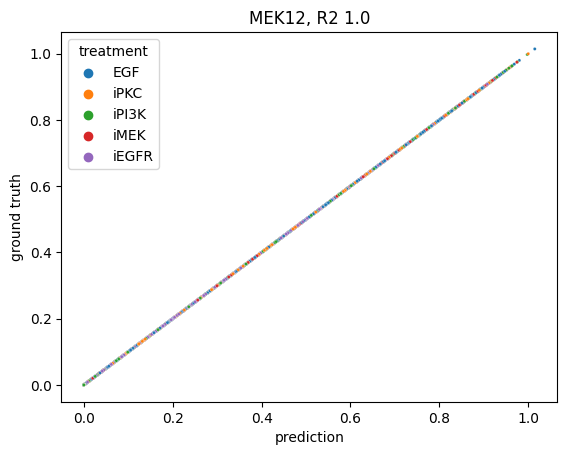

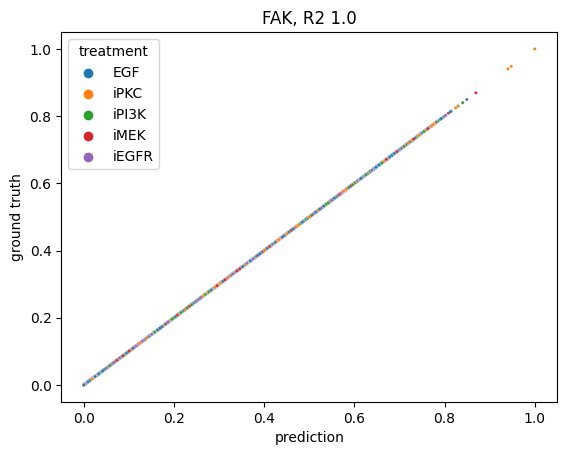

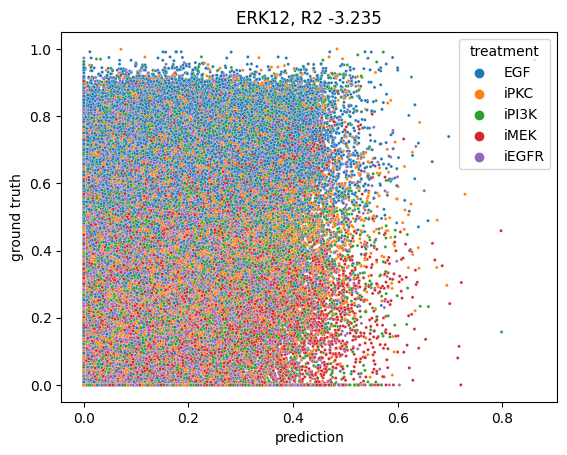

In [17]:
for node in all_test_pred.columns:
    sns.scatterplot(x= all_test_pred[node], y=all_test[node], hue=all_test["treatment"], s=5)
    r2 = r2_score(y_true=all_test[node], y_pred=all_test_pred[node])
    plt.xlabel("prediction")
    plt.ylabel("ground truth")
    plt.title(f"{node}, R2 {round(r2, 3)}")
    plt.show()

In [85]:
sqrt(sum((all_test["ERK12"] - all_test_pred["ERK12"])**2)/len(all_test))

0.418714424446355

In [30]:
succes_runs = [9, 10, 11, 12, 13, 14, 18, 19, 20, 21, 22, 23, 24, 25, 26]
unfinished_runs = [i for i in range(27) if not i in succes_runs]
unfinished_runs

[0, 1, 2, 3, 4, 5, 6, 7, 8, 15, 16, 17]

In [31]:
config_list = []
for i in unfinished_runs:
    with open(f"{work_dir}{i}/{i}_config.json") as f:
        config = json.load(f)
        
    
    print(config["learning_rate"])
    print(config["batch_size"])
    config_list.append(config)

0.01
10
0.01
10
0.01
10
0.005
10
0.005
10
0.005
10
0.2
10
0.2
10
0.2
10
0.2
300
0.2
300
0.2
300


In [32]:
temp=[{key: value for key, value in config.items() if key in ["learning_rate", "n_epochs", "batch_size"]} for config in config_list]
unfinished_params = pd.concat([pd.DataFrame(c, 
                        index=[0,1,2]) for c in temp], 
          keys=unfinished_runs, 
          names=["param_setting", ""]).reset_index("param_setting", drop=False).reset_index(drop=True)


In [46]:
all_params = pd.concat([succes_params, 
           unfinished_params], 
          keys=["finished", "unfinished"], 
          names=["state", ""]).reset_index("state", drop=False).reset_index(drop=True)
all_params["param_setting"] = all_params["param_setting"].astype("category")

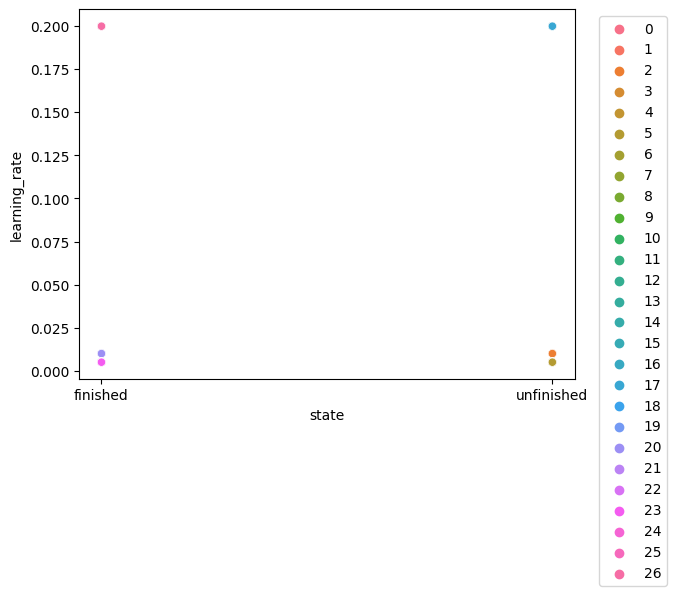

In [52]:
sns.scatterplot(data = all_params, x="state", y="learning_rate", hue="param_setting")
plt.legend(bbox_to_anchor=(1.2,1))

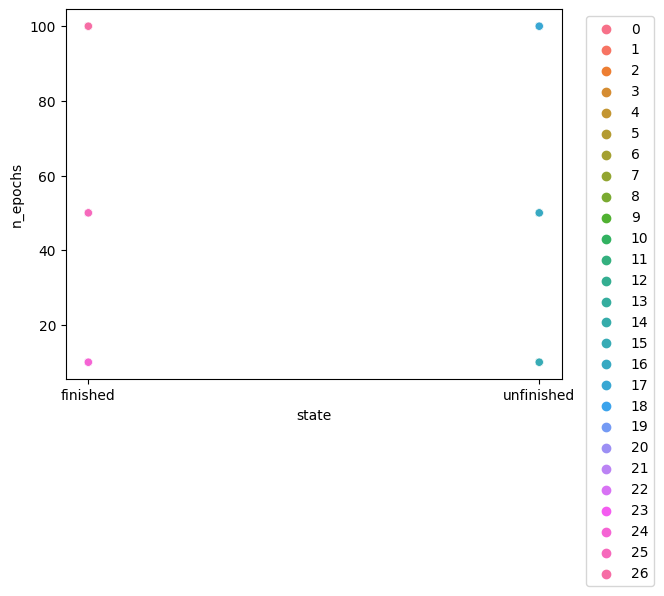

In [53]:
sns.scatterplot(data = all_params, x="state", y="n_epochs", hue="param_setting")
plt.legend(bbox_to_anchor=(1.2,1))

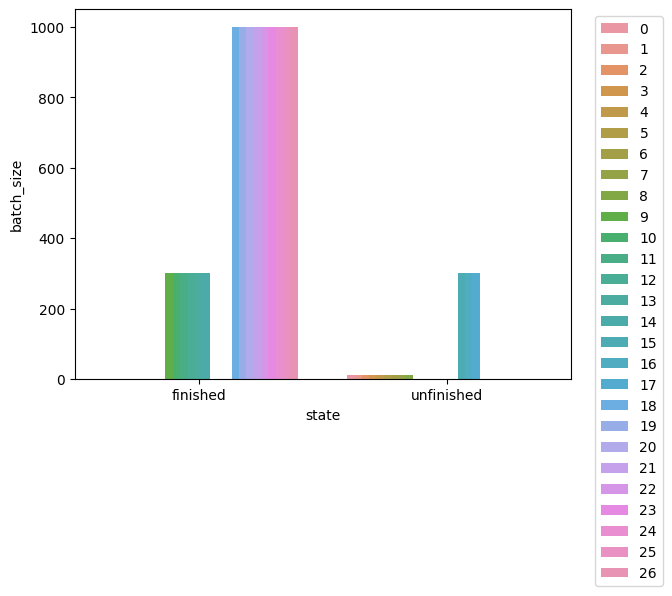

In [54]:
sns.barplot(data = all_params, x="state", y="batch_size", hue="param_setting")
plt.legend(bbox_to_anchor=(1.2,1))

In [5]:
test = pd.read_csv("/dccstor/ipc1/CAR/DREAM/Model/Test/MEK_FAK_ERK/9_1/test_data.csv", index_col=0)
test_output_states = pd.read_csv("/dccstor/ipc1/CAR/DREAM/Model/Test/MEK_FAK_ERK/9_1/test_output_states.csv", index_col=0)

/tmp/ipykernel_1550863/4287084940.py:1: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv("/dccstor/ipc1/CAR/DREAM/Model/Test/MEK_FAK_ERK/9_1/test_data.csv", index_col=0)


In [6]:
test

,treatment,cell_line,time,cellID,fileID,b-catenin,cleavedCas,CyclinB,GAPDH,IdU,...,PLCg2,RB,S6,p70S6K,SMAD23,SRC,STAT1,STAT3,STAT5,inhibitor
31325,EGF,AU565,9.0,1,35,0.224784,0.898342,1.57661,1.214725,11.34354,...,3.286285,7.70323,7.70364,4.438535,3.016792,3.833837,3.988160,3.178351,4.465477,NaN
31326,EGF,AU565,9.0,1,68,1.125804,3.095854,2.44750,1.955010,6.79128,...,1.800372,6.17309,5.60473,2.853027,1.957538,2.182407,2.920442,2.184977,3.017998,NaN
31327,EGF,AU565,9.0,2,35,1.510907,2.707742,1.96442,1.058979,6.32854,...,2.353157,6.72738,4.68711,3.080103,2.882754,2.458562,2.755595,2.556941,2.983355,NaN
31328,EGF,AU565,9.0,2,68,0.224784,3.716238,1.49923,1.837882,4.67460,...,2.733310,5.05114,7.06001,4.217186,2.383203,2.100572,3.761684,3.508876,4.278205,NaN
31329,EGF,AU565,9.0,3,35,0.224784,1.922619,1.90138,0.830626,6.02795,...,1.876391,4.06274,6.50938,2.978015,1.730351,2.669826,3.065669,0.652426,2.634295,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841507,iPKC,MDAMB436,9.0,12900,2115,2.418936,3.510632,4.16807,5.695531,4.25020,...,3.138384,3.08615,2.39632,3.670383,2.972844,3.122438,3.415360,3.173697,2.887220,PKC
841508,iPKC,MDAMB436,9.0,12901,2115,1.410108,2.126495,2.68310,3.699897,5.92256,...,3.943163,2.97775,4.11013,2.033424,0.551474,1.644971,3.524170,3.137471,3.438150,PKC
841509,iPKC,MDAMB436,9.0,12902,2115,0.224784,0.898342,2.18587,3.049110,5.85892,...,2.552216,2.48340,3.08109,2.646712,1.792480,2.724057,2.720530,2.463929,2.046930,PKC
841510,iPKC,MDAMB436,9.0,12903,2115,0.224784,0.898342,1.20489,3.836096,5.02410,...,4.697797,2.20794,4.09576,0.887454,2.607552,2.139663,2.922870,0.652426,2.497180,PKC


In [7]:
test_output_states

,MEK12,FAK,ERK12
0,0.680814,0.329859,0.224573
1,0.481773,0.229309,0.110475
2,0.461362,0.090158,0.041595
3,0.570929,0.295859,0.168915
4,0.516467,0.299340,0.154599
...,...,...,...
320302,0.538622,0.417395,0.224818
320303,0.533794,0.172349,0.091999
320304,0.341012,0.085917,0.029299
320305,0.451182,0.229219,0.103419


In [19]:
import numpy as np
node_r2_scores = {}
node_mse = {}
for node in test_output_states.columns:
    node_r2_scores[f"test_r2_{node}"] = r2_score(
        test[node], test_output_states[node]
    )
    node_mse[f"test_mse_{node}"] = sum(
        (np.array(test[node]) - np.array(test_output_states[node])) ** 2
    ) / len(test)
#     mlflow.log_metrics(node_r2_scores)
#     mlflow.log_metrics(node_mse)
print("test_mse", sum(node_mse.values()) / len(node_mse))

test_mse 0.03106020210364954


In [20]:
sum(
        (test[node] - test_output_states[node]) ** 2
    ) / len(test)

nan

In [12]:
 (test[node] - test_output_states[node])

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
841507   NaN
841508   NaN
841509   NaN
841510   NaN
841511   NaN
Name: ERK12, Length: 488767, dtype: float64

In [16]:
test_output_states[test_output_states[node].isna()]

,MEK12,FAK,ERK12
